In [1]:
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
import itertools
import os
import pandas as pd

In [3]:
MISS_FAC = 10 # a multiple of actual missing for experiments
MISS_MAX = 0.7 # maximum allowed missing value
data_dir="/data/rmthomas/HeteroSmallSample"
df = pd.read_csv(os.path.join(data_dir, "real_data.csv"))
df = df[df.columns[25:125]] # these are features we used 

# percentage of missing data (nan) per feature
nan_ratio_per_feature = np.sum(np.isnan(df.values),axis=0)/df.values.shape[0]
nan_ratio_per_feature = np.array([min(x*MISS_FAC, MISS_MAX) for x in nan_ratio_per_feature])

# load the simulated data
df_full = pd.read_csv(os.path.join(data_dir, "simulated_data.csv"), index_col=0)
df_nan = df_full.copy()

# Set elements to missing (nan) with the same probability as the real data
N = df_full.shape[0]
for i, percent_missing in enumerate(nan_ratio_per_feature):
    df_nan.loc[np.random.random_sample((N)) < percent_missing, f'f{i}'] = np.nan
    



/data/rmthomas/anaconda3/envs/py36ml/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/data/rmthomas/anaconda3/envs/py36ml/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


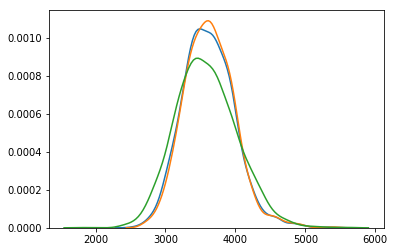

In [4]:
i=80
sns.kdeplot(df_full[f'f{i}'], legend=False)
sns.kdeplot(df_nan[f'f{i}'], legend=False)
sns.kdeplot(df[df.columns[i]], legend=False)


In [3]:
perc_missing = np.linspace(0,.05,50)
row_len = 3000
col_lens = [10, 20, 100, 200]
row_list = list(range(row_len))

data_removed = []
for col_len in col_lens:

    col_list = list(range(col_len))
    total_data = row_len * col_len

    data_removed_per_col_len = []    
    F = np.full((row_len, col_len), True)
    for pmiss in perc_missing:

        tot_miss = int(np.floor(total_data*pmiss))
        rows = np.random.choice(row_list, tot_miss)
        cols = np.random.choice(col_list, tot_miss)

        for x,y in zip(rows, cols):
            F[x,y] = False

        rows_removed = len(row_list) - sum(F.all(axis=1))
        perc_removed = rows_removed * len(col_list)/total_data * 100.0

        data_removed_per_col_len.append(perc_removed)
    data_removed.append(data_removed_per_col_len)

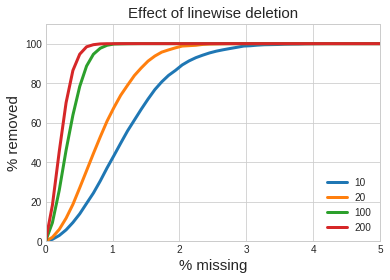

In [6]:
data_removed = np.array(data_removed)
plt.style.use('seaborn-whitegrid')
ax = plt.axes()
for i in [0,1,2,3]:
    label =f'{col_lens[i]}'
    ax.plot(perc_missing*100, data_removed[i],label=label, linewidth=3)
ax.set(xlim=(0,5), ylim=(0,110))
ax.set_ylabel('% removed',fontsize=15)
ax.set_xlabel('% missing',fontsize=15)
ax.set_title('Effect of linewise deletion', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.legend()
plt.savefig('linewise_deletion.png')